# Pracownia 2 z Analizy numerycznej
### Zadanie 19
#### Autorzy:
Martyna Firgolska  
Michał Dymowski

In [1]:
using Printf

In [2]:
using Plots

**Badane całki: definicje, przybliżone wartości, wykresy**

In [3]:
# przybliżone wartości całek I_c i I_s
#Int_C_exact_value = 1.809048475800544162949576733665114291615983641191003479196640074902159185352954615877833522127454977
Int_C_exact_value = 1.809048475800544162949576733665114291615983641191003479196640076
#Int_S_exact_value = 0.6205366034467622036163048463307930151490187776648934354652171212875447590052889374947286820148085157
Int_S_exact_value = 0.6205366034467622036163048463307930151490187776648934354652171213


0.6205366034467622

In [4]:
# badane funkcje zmodyfikowane zgodnie z podpunktem A
# funkcje C i S przyjmują wartość 0 w x=0
function C(x)
    if( x == 0)
        return 0;
    else
        return cos(x)/sqrt(x);
    end
end

function S(x)
    if(x == 0)
        return 0;
    else
        return sin(x)/sqrt(x);
    end
end

S (generic function with 1 method)

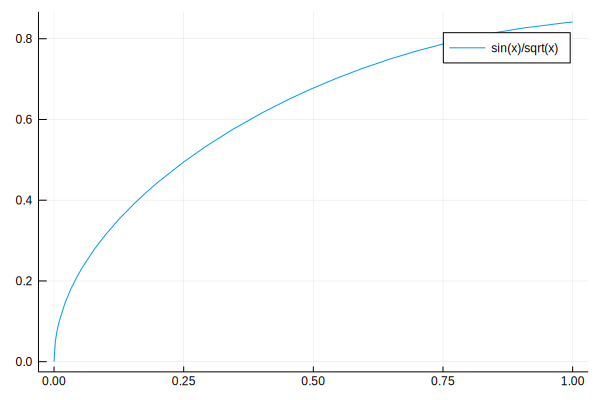

In [5]:
# Wykres funkcji S na badanym przedziale
plot(S, 0, 1, label="sin(x)/sqrt(x)")

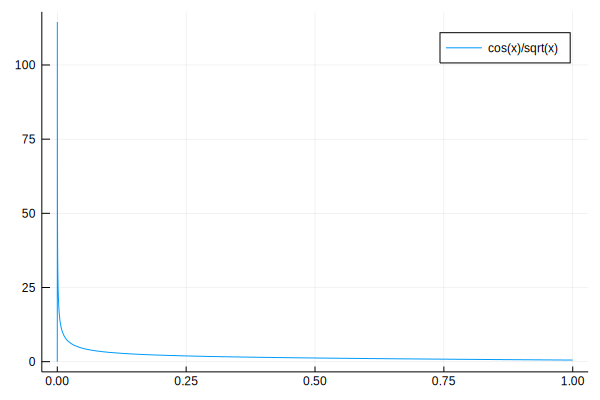

In [6]:
# Wykres funkcji C na badanym przedziale
plot(C, 0, 1, label="cos(x)/sqrt(x)")

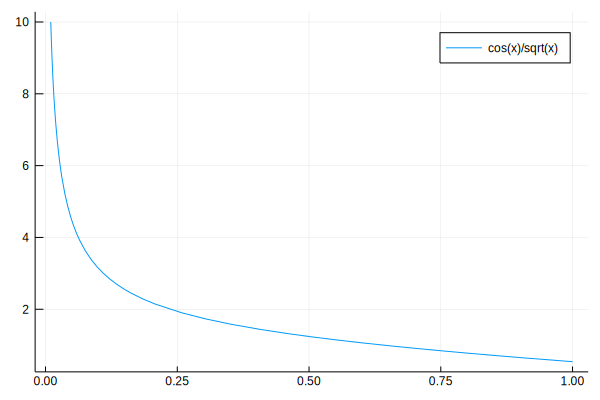

In [7]:
# Wykres funkcji C na przedziale [0.01, 1]
plot(C, 0.01, 1, label="cos(x)/sqrt(x)")

### Metoda trapezów: 

In [8]:
# Całkowanie funkcji f na przedziale [left,right] 
# metodą trapezów z points równoodległymi punktami
function int_trapez(f, left, right, points)
    width = (right-left)/(points-1);
    sum = (f(left)+f(right))*0.5;
    
    for i in 1:(points-1)
        sum += f(left + i*width);
    end
    
    sum *= width;
    return sum;
end

int_trapez (generic function with 1 method)

In [9]:
# Całkowanie funkcji f na przedziale [left,right] 
# metodą trapezów z points równoodległymi punktami
# zaczynajac od prawej strony
function int_trapez_right_to_left(f, left, right, points)
    width = (right-left)/(points-1);
    sum = (f(left)+f(right))*0.5;
    
    for i in (points-1):1
        sum += f(left + i*width);
    end
    
    sum *= width;
    return sum;
end

int_trapez_right_to_left (generic function with 1 method)

### Podpunkt A

In [10]:
## badany zakres ilości punktów metody trapezów
Arange = 100:100:1000

100:100:1000

In [11]:
# wyniki metody trapezów dla I_c
AresultsIC = [int_trapez(C,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 1.6677256034277628
 1.7082394599682968
 1.726399997150005 
 1.7372928699596446
 1.7447564299910763
 1.750281758632448 
 1.7545855714753669
 1.7580609258924103
 1.7609438155984576
 1.7633856545771385

In [12]:
# wyniki metody trapezów dla I_s
AresultsIS = [int_trapez(S,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 0.6288262828757042
 0.6246912988653139
 0.6233107905275299
 0.6226195323389588
 0.6222043082298286
 0.6219272438774593
 0.6217291960934527
 0.6215805696160139
 0.6214649112045778
 0.6213723429157811

In [13]:
# moduł błędu bezwzględnego
AerrorIC = abs.([x-Int_C_exact_value for x in AresultsIC])

10-element Array{Float64,1}:
 0.1413228723727813  
 0.10080901583224722 
 0.08264847865053904 
 0.07175560584089946 
 0.06429204580946779 
 0.058766717168096116
 0.0544629043251772  
 0.05098754990813381 
 0.04810466020208648 
 0.04566282122340559 

In [14]:
# moduł błędu bezwzględnego
AerrorIS = abs.([x-Int_S_exact_value for x in AresultsIS])

10-element Array{Float64,1}:
 0.008289679428941987 
 0.004154695418551735 
 0.0027741870807677094
 0.002082928892196634 
 0.001667704783066437 
 0.0013906404306971432
 0.0011925926466904713
 0.001043966169251731 
 0.0009283077578156052
 0.0008357394690189368

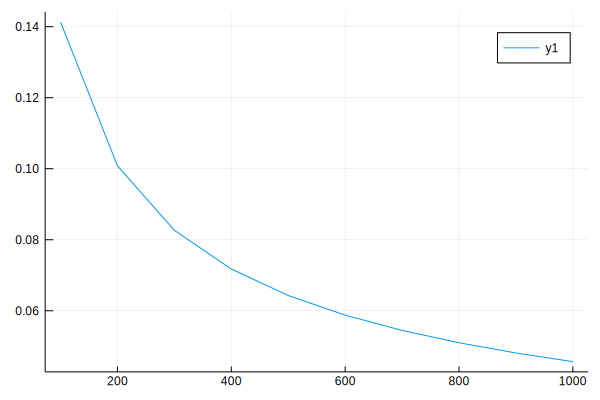

In [15]:
# wykres błędu bezwzględnego w zależności od ilości punktów metody trapezów dla I_c
plot(Arange, AerrorIC)

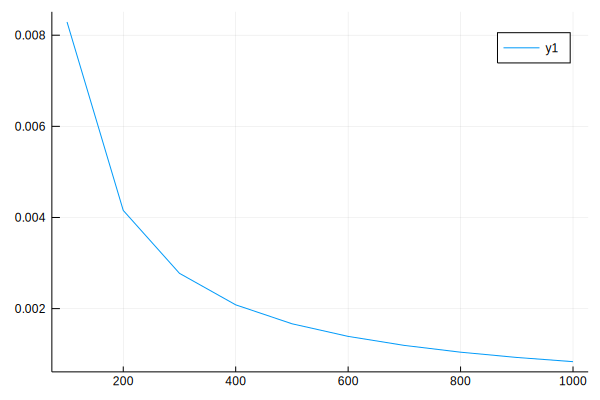

In [16]:
# wykres błędu bezwzględnego w zależności od ilości punktów metody trapezów dla I_s
plot(Arange, AerrorIS)

In [17]:
# błędy względne
Arel_errorIS = [abs(x/Int_S_exact_value) for x in AerrorIS]
Arel_errorIC = [abs(x/Int_C_exact_value) for x in AerrorIC]

10-element Array{Float64,1}:
 0.07812000300889825 
 0.05572488365058156 
 0.04568616029703972 
 0.039664833088094015
 0.035539150370758936
 0.03248487696941926 
 0.030105829143730466
 0.028184733903037447
 0.026591139400396167
 0.025241347500762124

In [18]:
# wykres błędu względnego w zależności od ilości punktów metody trapezów dla I_c
plot(Arange, Arel_errorIC)

In [19]:
# wykres błędu względnego w zależności od ilości punktów metody trapezów dla I_s
plot(Arange, Arel_errorIS)

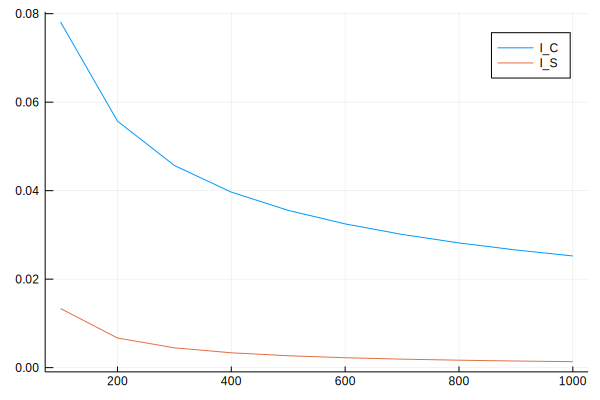

In [20]:
# wykres z błędu względnego - porównanie działania metody trapezów dla I_s i I_c
plot(Arange, Arel_errorIC, label = "I_C")
plot!(Arange, Arel_errorIS, label = "I_S")

In [21]:
# wykres logarytmu z błędu względnego - porównanie działania metody trapezów dla I_s i I_c
plot(Arange, [log10(x) for x in Arel_errorIC], label = "I_C")
plot!(Arange, [log10(x) for x in Arel_errorIS], label = "I_S")

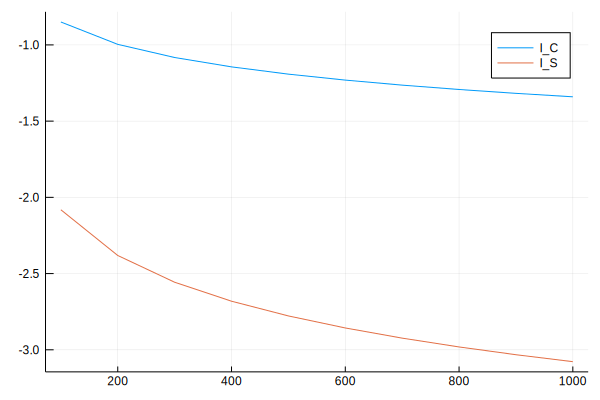

In [22]:
# wykres logarytmu z błędu bezwzględnego - porównanie działania metody trapezów dla I_s i I_c
plot(Arange, [log10(x) for x in AerrorIC], label = "I_C")
plot!(Arange, [log10(x) for x in AerrorIS], label = "I_S")

### Podpunkt B

In [23]:
## Ale jak użyjemy poprawnie wyprowadzonego wzorku to wyniki już są poprawne ##
# wzorek: int_trapez(C,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*cos(0*h)+cos(h))
Brange = Arange
h = 2e-10
BresultsIC = [(int_trapez(C,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*cos(0)+cos(h))) for p in Brange]

10-element Array{Float64,1}:
 358.79239077659105 
 179.3732881036611  
 119.97170938813724 
  90.34719346043909 
  72.5971675786862  
  60.77424835413889 
  52.334498043775646
  46.00757487519528 
  41.088379269190014
  37.15414371263429 

In [24]:
BresultsIS = [(int_trapez(S,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*sin(0)+sin(h))) for p in Brange]

10-element Array{Float64,1}:
 0.6288263542843195
 0.6246913343871437
 0.6233108141675909
 0.6226195500532103
 0.6222043223934388
 0.6219272556760056
 0.6217292062036702
 0.6215805784605386
 0.6214649190650054
 0.6213723499891415

In [25]:
# nie wiem dlaczego dla S niepoprawny wzorek działa lepiej
# ale zobaczmy jak to będzie wyglądać jeśli za h przyjmiemy 1/p
BresultsICv2 = [(int_trapez(C,1.0/p,1.0,p)+(2.0/3.0)*sqrt(1.0/p)*(2*cos(0)+cos(1.0/p))) for p in Brange]
BresultsISv2 = [(int_trapez(S,1.0/p,1.0,p)+(2.0/3.0)*sqrt(1.0/p)*(2*sin(0)+sin(1.0/p))) for p in Brange]

10-element Array{Float64,1}:
 0.6289110872019322
 0.6247296338953485
 0.6233336846692772
 0.622635190715545 
 0.6222158984721524
 0.6219362781243871
 0.6217364995379555
 0.6215866360800248
 0.6214700568571285
 0.6213767809176636

In [26]:
BerrorICv2 = abs.([x-Int_C_exact_value for x in BresultsICv2])
BerrorISv2 = abs.([x-Int_S_exact_value for x in BresultsISv2])
BerrorIC = abs.([x-Int_C_exact_value for x in BresultsIC])
BerrorIS = abs.([x-Int_S_exact_value for x in BresultsIS])

10-element Array{Float64,1}:
 0.008289750837557341 
 0.004154730940381546 
 0.002774210720828729 
 0.002082946606448144 
 0.0016677189466766107
 0.0013906522292433943
 0.0011926027569080233
 0.0010439750137763992
 0.0009283156182432473
 0.0008357465423792787

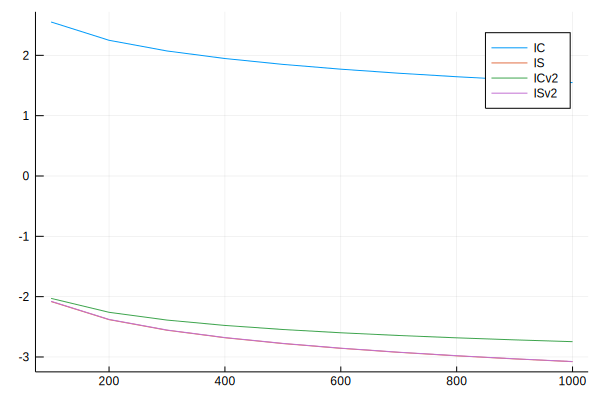

In [27]:
plot(Brange, [log10(x) for x in BerrorIC], label="IC")
plot!(Brange, [log10(x) for x in BerrorIS], label="IS")
plot!(Brange, [log10(x) for x in BerrorICv2], label="ICv2")
plot!(Brange, [log10(x) for x in BerrorISv2], label="ISv2")

In [28]:
#wykresy Is i Isv2 się pokrywają
plot(Brange, [log10(x) for x in BerrorIS], label="IS")
plot!(Brange, [log10(x) for x in BerrorISv2], label="ISv2")

In [29]:
Brel_errorICv2 = [x/Int_C_exact_value for x in BerrorICv2]
Brel_errorISv2 = [x/Int_S_exact_value for x in BerrorISv2]
Brel_errorIC = [x/Int_C_exact_value for x in BerrorIC]
Brel_errorIS = [x/Int_S_exact_value for x in BerrorIS]

10-element Array{Float64,1}:
 0.013359003790448512 
 0.00669538415188427  
 0.004470664108159637 
 0.003356686124361472 
 0.0026875432285755397
 0.0022410478632832217
 0.0019218894587099736
 0.0016823745899559415
 0.0014959884930025574
 0.0013468126420538866

In [30]:
plot(Brange, [log10(x) for x in Brel_errorIC], label="IC")
plot!(Brange, [log10(x) for x in Brel_errorIS], label="IS")
plot!(Brange, [log10(x) for x in Brel_errorICv2], label="ICv2")
plot!(Brange, [log10(x) for x in Brel_errorISv2], label="ISv2")

### Podpunkt C

In [31]:
#Podpunkt C, 
#funkcja C zmienia się w 2*cos(t^2), a S w 2*sin(t^2)
Cnew(x) = 2*cos(x^2);
Snew(x) = 2*sin(x^2);


In [32]:
plot(Cnew, 0, 1, label="Cnew")
plot!(Snew, 0, 1, label="Snew")

In [33]:
Crange = 20:20:200
CresultsIC = [int_trapez(Cnew,0.0,1.0,p) for p in Crange]
CresultsIS = [int_trapez(Snew,0.0,1.0,p) for p in Crange]
CresultsIC_rangeA = [int_trapez(Cnew,0.0,1.0,p) for p in Arange]
CresultsIS_rangeA = [int_trapez(Snew,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 0.6375543934526344
 0.6289981461788563
 0.6261671864394782
 0.624755634400694 
 0.6239099559383896
 0.623346691324667 
 0.622944614354665 
 0.6226431959091088
 0.6224088418274413
 0.6222214105045255

In [34]:
CerrorIC = abs.([x-Int_C_exact_value for x in CresultsIC])
CerrorIS = abs.([x-Int_S_exact_value for x in CresultsIS])
Crel_errorIC = [x/Int_C_exact_value for x in CerrorIC]
Crel_errorIS = [x/Int_S_exact_value for x in CerrorIS]
CerrorIC_rangeA = abs.([x-Int_C_exact_value for x in CresultsIC_rangeA])
CerrorIS_rangeA = abs.([x-Int_S_exact_value for x in CresultsIS_rangeA])
Crel_errorIC_rangeA = [x/Int_C_exact_value for x in CerrorIC_rangeA]
Crel_errorIS_rangeA = [x/Int_S_exact_value for x in CerrorIS_rangeA]

10-element Array{Float64,1}:
 0.027424312943583246 
 0.013635847885675996 
 0.009073732252764814 
 0.006799004169129241 
 0.005436186153870958 
 0.004528480451106712 
 0.003880530003431715 
 0.0033947916217118034
 0.0030171280312551218
 0.002715080864537348 

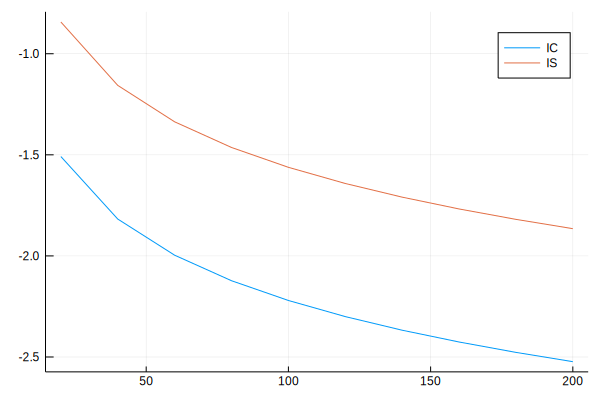

In [35]:
plot(Crange, [log10(x) for x in Crel_errorIC], label="IC")
plot!(Crange, [log10(x) for x in Crel_errorIS], label="IS")

### Podpunkt D

In [36]:
# długość wektora V
vlength(V) = size(V, 1); 
# Zmiana przedziału całkowania z [a,b] na [-1,1]
function shift(f, a, b)
    function out(x)
        return (b-a)*0.5*f((x+1.0)*0.5*(b-a)+a);
    end
    return out
end

shift (generic function with 1 method)

In [37]:
## Kwadratura Gaussa-Legendre'a na przedziale [-1,1]

function gl_base(f, deg)
# punkty
absc = [ [0.5773502691896257645091488], #2
		  [0.0000000000000000000000000,0.7745966692414833770358531], #3
		  [0.3399810435848562648026658,0.8611363115940525752239465], #4
		  [0.0000000000000000000000000,0.5384693101056830910363144,0.9061798459386639927976269], # 5
		  [0.2386191860831969086305017,0.6612093864662645136613996,0.9324695142031520278123016], #6
		  [0.0000000000000000000000000,0.4058451513773971669066064,0.7415311855993944398638648,0.9491079123427585245261897], #7
		  [0.1834346424956498049394761,0.5255324099163289858177390,0.7966664774136267395915539,0.9602898564975362316835609], #8
		  [0.0000000000000000000000000,0.3242534234038089290385380,0.6133714327005903973087020,0.8360311073266357942994298,0.9681602395076260898355762], #9
		  [0.1488743389816312108848260,0.4333953941292471907992659,0.6794095682990244062343274,0.8650633666889845107320967,0.9739065285171717200779640], #10
		  [0.0000000000000000000000000,0.2695431559523449723315320,0.5190961292068118159257257,0.7301520055740493240934163,0.8870625997680952990751578,0.9782286581460569928039380], #11
		  [0.1252334085114689154724414,0.3678314989981801937526915,0.5873179542866174472967024,0.7699026741943046870368938,0.9041172563704748566784659,0.9815606342467192506905491], #12
		  [0.0000000000000000000000000,0.2304583159551347940655281,0.4484927510364468528779129,0.6423493394403402206439846,0.8015780907333099127942065,0.9175983992229779652065478,0.9841830547185881494728294], #13
		  [0.1080549487073436620662447,0.3191123689278897604356718,0.5152486363581540919652907,0.6872929048116854701480198,0.8272013150697649931897947,0.9284348836635735173363911,0.9862838086968123388415973], #14
		  [0.0000000000000000000000000,0.2011940939974345223006283,0.3941513470775633698972074,0.5709721726085388475372267,0.7244177313601700474161861,0.8482065834104272162006483,0.9372733924007059043077589,0.9879925180204854284895657], #15
		  [0.0950125098376374401853193,0.2816035507792589132304605,0.4580167776572273863424194,0.6178762444026437484466718,0.7554044083550030338951012,0.8656312023878317438804679,0.9445750230732325760779884,0.9894009349916499325961542], #16
		  [0.0000000000000000000000000,0.1784841814958478558506775,0.3512317634538763152971855,0.5126905370864769678862466,0.6576711592166907658503022,0.7815140038968014069252301,0.8802391537269859021229557,0.9506755217687677612227170,0.9905754753144173356754340], #17
		  [0.0847750130417353012422619,0.2518862256915055095889729,0.4117511614628426460359318,0.5597708310739475346078715,0.6916870430603532078748911,0.8037049589725231156824175,0.8926024664975557392060606,0.9558239495713977551811959,0.9915651684209309467300160], #18
		  [0.0000000000000000000000000,0.1603586456402253758680961,0.3165640999636298319901173,0.4645707413759609457172671,0.6005453046616810234696382,0.7209661773352293786170959,0.8227146565371428249789225,0.9031559036148179016426609,0.9602081521348300308527788,0.9924068438435844031890177], #19
		  [0.0765265211334973337546404,0.2277858511416450780804962,0.3737060887154195606725482,0.5108670019508270980043641,0.6360536807265150254528367,0.7463319064601507926143051,0.8391169718222188233945291,0.9122344282513259058677524,0.9639719272779137912676661,0.9931285991850949247861224], #20
		  ];
# wagi
weight =[ [1.0000000000000000000000000], #2
		   [0.8888888888888888888888889,0.5555555555555555555555556], #3
		   [0.6521451548625461426269361,0.3478548451374538573730639], #4
		   [0.5688888888888888888888889,0.4786286704993664680412915,0.2369268850561890875142640], # 5
		   [0.4679139345726910473898703,0.3607615730481386075698335,0.1713244923791703450402961], #6
		   [0.4179591836734693877551020,0.3818300505051189449503698,0.2797053914892766679014678,0.1294849661688696932706114], #7
		   [0.3626837833783619829651504,0.3137066458778872873379622,0.2223810344533744705443560,0.1012285362903762591525314], #8
		   [0.3302393550012597631645251,0.3123470770400028400686304,0.2606106964029354623187429,0.1806481606948574040584720,0.0812743883615744119718922], #9
		   [0.2955242247147528701738930,0.2692667193099963550912269,0.2190863625159820439955349,0.1494513491505805931457763,0.0666713443086881375935688], #10
		   [0.2729250867779006307144835,0.2628045445102466621806889,0.2331937645919904799185237,0.1862902109277342514260976,0.1255803694649046246346943,0.0556685671161736664827537], #11
		   [0.2491470458134027850005624,0.2334925365383548087608499,0.2031674267230659217490645,0.1600783285433462263346525,0.1069393259953184309602547,0.0471753363865118271946160], #12
		   [0.2325515532308739101945895,0.2262831802628972384120902,0.2078160475368885023125232,0.1781459807619457382800467,0.1388735102197872384636018,0.0921214998377284479144218,0.0404840047653158795200216], #13
		   [0.2152638534631577901958764,0.2051984637212956039659241,0.1855383974779378137417166,0.1572031671581935345696019,0.1215185706879031846894148,0.0801580871597602098056333,0.0351194603317518630318329], #14
		   [0.2025782419255612728806202,0.1984314853271115764561183,0.1861610000155622110268006,0.1662692058169939335532009,0.1395706779261543144478048,0.1071592204671719350118695,0.0703660474881081247092674,0.0307532419961172683546284], #15
		   [0.1894506104550684962853967,0.1826034150449235888667637,0.1691565193950025381893121,0.1495959888165767320815017,0.1246289712555338720524763,0.0951585116824927848099251,0.0622535239386478928628438,0.0271524594117540948517806], #16
		   [0.1794464703562065254582656,0.1765627053669926463252710,0.1680041021564500445099707,0.1540457610768102880814316,0.1351363684685254732863200,0.1118838471934039710947884,0.0850361483171791808835354,0.0554595293739872011294402,0.0241483028685479319601100], #17
		   [0.1691423829631435918406565,0.1642764837458327229860538,0.1546846751262652449254180,0.1406429146706506512047313,0.1225552067114784601845191,0.1009420441062871655628140,0.0764257302548890565291297,0.0497145488949697964533349,0.0216160135264833103133427], #18
		   [0.1610544498487836959791636,0.1589688433939543476499564,0.1527660420658596667788554,0.1426067021736066117757461,0.1287539625393362276755158,0.1115666455473339947160239,0.0914900216224499994644621,0.0690445427376412265807083,0.0448142267656996003328382,0.0194617882297264770363120], #19
		   [0.1527533871307258506980843,0.1491729864726037467878287,0.1420961093183820513292983,0.1316886384491766268984945,0.1181945319615184173123774,0.1019301198172404350367501,0.0832767415767047487247581,0.0626720483341090635695065,0.0406014298003869413310400,0.0176140071391521183118620], #20
		  ];
# obliczanie całki
  out = 0.0;
  ABSC = absc[deg];
  WEIGHT = weight[deg];

  for i in 1:vlength(ABSC)
	  out += WEIGHT[i]*f(ABSC[i]);
	if (ABSC[i] != 0.0)
	  out += WEIGHT[i]*f(-1.0*ABSC[i]);
	end
  end

  return out;
end

gl_base (generic function with 1 method)

In [38]:
# Wyniki dla IC (po podstawieniu)
DresultsICv2 = [gl_base(shift(Cnew,0,1), i) for i in 1:19]

19-element Array{Float64,1}:
 1.811712813751607 
 1.808856161750068 
 1.8090489650803137
 1.8090485296613197
 1.8090484754861307
 1.8090484757945726
 1.8090484758005878
 1.8090484758005443
 1.8090484758005438
 1.8090484758005443
 1.8090484758005445
 1.8090484758005443
 1.809048475800544 
 1.809048475800544 
 1.8090484758005443
 1.809048475800544 
 1.8090484758005438
 1.8090484758005445
 1.809048475800544 

In [39]:
# wartość błędu bezwzględnego - IC (po podstawieniu)
DerrorICv2 = abs.([x-Int_C_exact_value for x in DresultsICv2])

19-element Array{Float64,1}:
 0.0026643379510629117 
 0.000192314050476039  
 4.892797695887907e-7  
 5.3860775617309287e-8 
 3.1441338421700493e-10
 5.971445560248867e-12 
 4.374278717023117e-14 
 2.220446049250313e-16 
 2.220446049250313e-16 
 2.220446049250313e-16 
 4.440892098500626e-16 
 2.220446049250313e-16 
 0.0                   
 0.0                   
 2.220446049250313e-16 
 0.0                   
 2.220446049250313e-16 
 4.440892098500626e-16 
 0.0                   

In [40]:
# błąd względny - IC (po podstawieniu)
Drel_errorICv2 = [abs(x/Int_C_exact_value) for x in DerrorICv2]

19-element Array{Float64,1}:
 0.001472784166208638  
 0.00010630674249397091
 2.704624979008777e-7  
 2.9772986372559584e-8 
 1.7380041962549955e-10
 3.3008764774013974e-12
 2.417999725014224e-14 
 1.2274110279260022e-16
 1.2274110279260022e-16
 1.2274110279260022e-16
 2.4548220558520043e-16
 1.2274110279260022e-16
 0.0                   
 0.0                   
 1.2274110279260022e-16
 0.0                   
 1.2274110279260022e-16
 2.4548220558520043e-16
 0.0                   

In [41]:
# Wyniki dla IS (po podstawieniu)
DresultsISv2 = [gl_base(shift(Snew,0,1), i) for i in 1:19]

19-element Array{Float64,1}:
 0.6273119924552861
 0.6205537702420836
 0.6205328934327076
 0.6205366207960306
 0.6205366040702774
 0.6205366034426264
 0.6205366034467139
 0.6205366034467626
 0.6205366034467623
 0.6205366034467622
 0.6205366034467622
 0.6205366034467621
 0.6205366034467623
 0.6205366034467621
 0.6205366034467622
 0.6205366034467623
 0.6205366034467623
 0.6205366034467621
 0.6205366034467623

In [42]:
# wartość błędu bezwzględnego - IC (po podstawieniu)
DerrorISv2 = abs.([x-Int_S_exact_value for x in DresultsISv2])

19-element Array{Float64,1}:
 0.006775389008523924  
 1.7166795321377215e-5 
 3.7100140546364457e-6 
 1.7349268355282277e-8 
 6.235152394395982e-10 
 4.135802811333633e-12 
 4.829470157119431e-14 
 4.440892098500626e-16 
 1.1102230246251565e-16
 0.0                   
 0.0                   
 1.1102230246251565e-16
 1.1102230246251565e-16
 1.1102230246251565e-16
 0.0                   
 1.1102230246251565e-16
 1.1102230246251565e-16
 1.1102230246251565e-16
 1.1102230246251565e-16

In [43]:
# błąd względny - IS (po podstawieniu)
Drel_errorISv2 = [abs(x/Int_S_exact_value) for x in DerrorISv2]

19-element Array{Float64,1}:
 0.010918596857768128  
 2.766443627341962e-5  
 5.978719118306999e-6  
 2.795849311533921e-8  
 1.0048000971679852e-9 
 6.664881311370469e-12 
 7.782732122962939e-14 
 7.156535285483162e-16 
 1.7891338213707906e-16
 0.0                   
 0.0                   
 1.7891338213707906e-16
 1.7891338213707906e-16
 1.7891338213707906e-16
 0.0                   
 1.7891338213707906e-16
 1.7891338213707906e-16
 1.7891338213707906e-16
 1.7891338213707906e-16

In [44]:
# błąd względny - IC (po podstawieniu)
Drel_errorICv2 = [abs(x/Int_C_exact_value) for x in DerrorICv2]

19-element Array{Float64,1}:
 0.001472784166208638  
 0.00010630674249397091
 2.704624979008777e-7  
 2.9772986372559584e-8 
 1.7380041962549955e-10
 3.3008764774013974e-12
 2.417999725014224e-14 
 1.2274110279260022e-16
 1.2274110279260022e-16
 1.2274110279260022e-16
 2.4548220558520043e-16
 1.2274110279260022e-16
 0.0                   
 0.0                   
 1.2274110279260022e-16
 0.0                   
 1.2274110279260022e-16
 2.4548220558520043e-16
 0.0                   

In [45]:
#　wykres błędu bezwględnego w zależności od stopnia kwadratury, stopnie z przedziału 1:20
plot([log10(x) for x in DerrorICv2], label="ICv2")
plot!([log10(x) for x in DerrorISv2], label="ISv2")

In [46]:
#  wykres błędu względnego w zależności od stopnia kwadratury, stopnie z przedziału 1:20
plot([log10(x) for x in Drel_errorICv2], label="ICv2")
plot!([log10(x) for x in Drel_errorISv2], label="ISv2")

## D.2
### złożone kwadratury Gaussa-Legendre'a

In [47]:
# Złożona kwadratura Gaussa-Legendre'a na przedziale [0,1]
function wtf(f, div, deg) # div - podział przedziału [0,1]
    out = 0.0;
    for i in 1:(vlength(div)-1)
        out += gl_base(shift(f,div[i],div[i+1]),deg);
    end
    
    return out
end

function eqd(steps) # podział odcinka punktami równoodległymi
    return [i*(1/Float64(steps)) for i in 0:steps]
end

eqd (generic function with 1 method)

In [48]:
# Liczba podprzedziałów
POINTS = 3

3

In [49]:
# Wyniki dla IC (po podstawieniu)
D2resultsICv2 = [wtf(Cnew, eqd(POINTS), i) for i in 1:19]

19-element Array{Float64,1}:
 1.8090504393247837
 1.8090482447860592
 1.8090484762153896
 1.8090484758009722
 1.8090484758005427
 1.809048475800544 
 1.8090484758005443
 1.8090484758005443
 1.809048475800544 
 1.809048475800544 
 1.809048475800544 
 1.8090484758005438
 1.8090484758005436
 1.809048475800544 
 1.809048475800544 
 1.8090484758005443
 1.8090484758005443
 1.8090484758005443
 1.809048475800544 

In [50]:
# wartość błędu bezwzględnego - IC (po podstawieniu)
D2errorICv2 = abs.([x-Int_C_exact_value for x in D2resultsICv2])

19-element Array{Float64,1}:
 1.963524239645409e-6  
 2.3101448487494736e-7 
 4.1484549129222614e-10
 4.2810199829546036e-13
 1.3322676295501878e-15
 0.0                   
 2.220446049250313e-16 
 2.220446049250313e-16 
 0.0                   
 0.0                   
 0.0                   
 2.220446049250313e-16 
 4.440892098500626e-16 
 0.0                   
 0.0                   
 2.220446049250313e-16 
 2.220446049250313e-16 
 2.220446049250313e-16 
 0.0                   

In [51]:
D2rel_errorICv2 = [x/Int_C_exact_value for x in D2errorICv2]

19-element Array{Float64,1}:
 1.0853906160676573e-6 
 1.2769944419135497e-7 
 2.2931695686520938e-10
 2.366448461841332e-13 
 7.364466167556013e-16 
 0.0                   
 1.2274110279260022e-16
 1.2274110279260022e-16
 0.0                   
 0.0                   
 0.0                   
 1.2274110279260022e-16
 2.4548220558520043e-16
 0.0                   
 0.0                   
 1.2274110279260022e-16
 1.2274110279260022e-16
 1.2274110279260022e-16
 0.0                   

In [52]:
# Wyniki dla IS (po podstawieniu)
D2resultsISv2 = [wtf(Snew, eqd(POINTS), i) for i in 1:19]

19-element Array{Float64,1}:
 0.6206206460519256
 0.6205364964408516
 0.6205366030523062
 0.6205366034476796
 0.6205366034467625
 0.6205366034467621
 0.6205366034467622
 0.6205366034467623
 0.6205366034467622
 0.6205366034467621
 0.6205366034467623
 0.6205366034467621
 0.6205366034467622
 0.6205366034467621
 0.6205366034467622
 0.6205366034467622
 0.6205366034467622
 0.6205366034467621
 0.6205366034467623

In [53]:
# wartość błędu bezwzględnego - IS (po podstawieniu)
D2errorISv2 = abs.([x-Int_S_exact_value for x in D2resultsISv2])

19-element Array{Float64,1}:
 8.404260516337025e-5  
 1.07005910576774e-7   
 3.944560234003802e-10 
 9.173772852477668e-13 
 3.3306690738754696e-16
 1.1102230246251565e-16
 0.0                   
 1.1102230246251565e-16
 0.0                   
 1.1102230246251565e-16
 1.1102230246251565e-16
 1.1102230246251565e-16
 0.0                   
 1.1102230246251565e-16
 0.0                   
 0.0                   
 0.0                   
 1.1102230246251565e-16
 1.1102230246251565e-16

In [54]:
D2rel_errorISv2 = [x/Int_S_exact_value for x in D2errorISv2]

19-element Array{Float64,1}:
 0.000135435371091015  
 1.724409325451732e-7  
 6.356692275836422e-10 
 1.4783612765986842e-12
 5.367401464112371e-16 
 1.7891338213707906e-16
 0.0                   
 1.7891338213707906e-16
 0.0                   
 1.7891338213707906e-16
 1.7891338213707906e-16
 1.7891338213707906e-16
 0.0                   
 1.7891338213707906e-16
 0.0                   
 0.0                   
 0.0                   
 1.7891338213707906e-16
 1.7891338213707906e-16

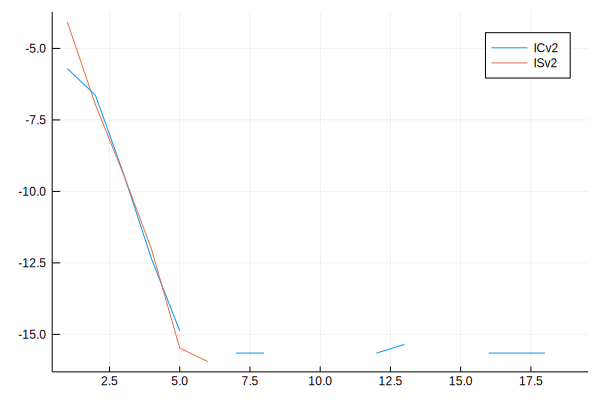

In [55]:
plot([log10(x) for x in D2errorICv2], label="ICv2")
plot!([log10(x) for x in D2errorISv2], label="ISv2")

In [56]:
plot([log10(x) for x in D2rel_errorICv2], label="ICv2")
plot!([log10(x) for x in D2rel_errorISv2], label="ISv2")

## #Podsumowanie wszystkich metod:

In [57]:
#DISv2 =["IS deg 1","IS deg 2","IS deg 3","IS deg 4"]
#DICv2 =["IC deg 1","IC deg 2","IC deg 4","IC deg 4"]

In [58]:
plo=plot(Brange, [log10(x) for x in Brel_errorIC], label="B: IC")
plo=plot!(Brange, [log10(x) for x in Brel_errorIS], label="B: IS")
plo=plot!(Brange, [log10(x) for x in Brel_errorICv2], label="B: ICv2")
plo=plot!(Brange, [log10(x) for x in Brel_errorISv2], label="B: ISv2")
plo=plot!(Arange, [log10(x) for x in Arel_errorIC], label="A: IC")
plo=plot!(Arange, [log10(x) for x in Arel_errorIS], label="A: IS")
plo=plot!(Arange, [log10(x) for x in Crel_errorIC_rangeA], label="C: IC")
plo=plot!(Arange, [log10(x) for x in Crel_errorIS_rangeA], label="C: IS")
#or i in 3:4
#    plo=plot!(Arange, [log10(Drel_errorISv2[i]) for x in Arange], label=DISv2[i])
#    plo=plot!(Arange, [log10(Drel_errorICv2[i]) for x in Arange], label=DICv2[i])
#end
plo=plot!(Arange, [log10(Drel_errorICv2[5]) for x in Arange], label="D: IC")
plo=plot!(Arange, [log10(Drel_errorISv2[5]) for x in Arange], label="D: IS")
plo

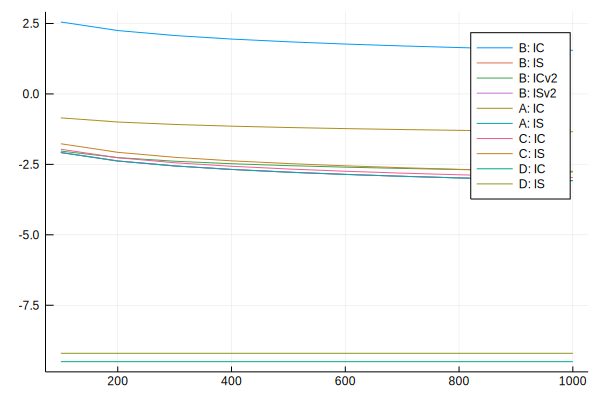

In [59]:
plo=plot(Brange, [log10(x) for x in BerrorIC], label="B: IC")
plo=plot!(Brange, [log10(x) for x in BerrorIS], label="B: IS")
plo=plot!(Brange, [log10(x) for x in BerrorICv2], label="B: ICv2")
plo=plot!(Brange, [log10(x) for x in BerrorISv2], label="B: ISv2")
plo=plot!(Arange, [log10(x) for x in AerrorIC], label="A: IC")
plo=plot!(Arange, [log10(x) for x in AerrorIS], label="A: IS")
plo=plot!(Arange, [log10(x) for x in CerrorIC_rangeA], label="C: IC")
plo=plot!(Arange, [log10(x) for x in CerrorIS_rangeA], label="C: IS")
#for i in 3:4
#    plo=plot!(Arange, [log10(DerrorISv2[i]) for x in Arange], label=DISv2[i])
#    plo=plot!(Arange, [log10(DerrorICv2[i]) for x in Arange], label=DICv2[i])
#end
plo=plot!(Arange, [log10(DerrorICv2[5]) for x in Arange], label="D: IC")
plo=plot!(Arange, [log10(DerrorISv2[5]) for x in Arange], label="D: IS")
plo

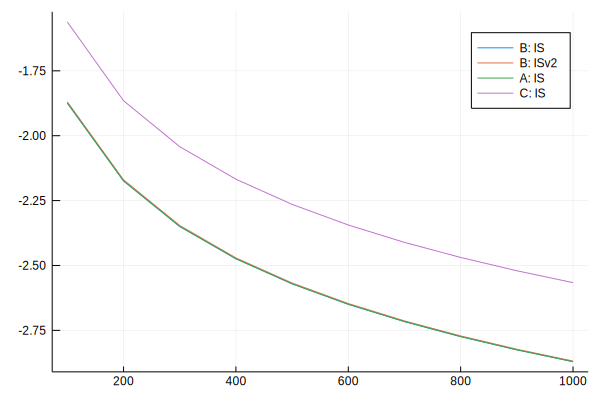

In [60]:
plo=plot(Brange, [log10(x) for x in Brel_errorIS], label="B: IS")
plo=plot!(Brange, [log10(x) for x in Brel_errorISv2], label="B: ISv2")
plo=plot!(Arange, [log10(x) for x in Arel_errorIS], label="A: IS")
plo=plot!(Arange, [log10(x) for x in Crel_errorIS_rangeA], label="C: IS")
plo

Wykresy do użycia w sprawozdaniu:

In [61]:
png(plot(C, 0.1, 1, label="cos(x)/sqrt(x)"), "WykresC.png") 
png(plot(S, 0, 1, label="sin(x)/sqrt(x)"), "WykresS.png") 

In [62]:
png(plot(Cnew, 0, 1, label="2cos(x^2)"), "WykresCnew.png") 
png(plot(Snew, 0, 1, label="2sin(x^2)"), "WykresSnew.png") 

In [63]:
plotD1=plot([log10(x) for x in Drel_errorICv2], label="IC", xlabel="quadrature degree", ylabel="log_10(relative error)")
plotD1=plot!([log10(x) for x in Drel_errorISv2], label="IS")
png(plotD1, "WykresD1logrelative.png")

In [64]:
plotD1=plot([log10(x) for x in DerrorICv2], label="IC", xlabel="quadrature degree", ylabel="log_10(absolute error)")
plotD1=plot!([log10(x) for x in DerrorISv2], label="IS")
png(plotD1, "WykresD1logabsolute.png")

In [65]:
plotD2=plot([log10(x) for x in D2errorICv2], label="IC", xlabel="quadrature degree", ylabel="log_10(relative error)")
plotD2=plot!([log10(x) for x in D2errorISv2], label="IS")
png(plotD2, "WykresD2logrelative.png")

In [66]:
plotA = plot(Arange, [log10(x) for x in AerrorIC], label = "I_C", xlabel="n", ylabel="log_10(absolute error)")
plotA = plot!(Arange, [log10(x) for x in AerrorIS], label = "I_S")
png(plotA, "WykresAlogabsolute.png")

In [67]:
plotB=plot(Brange, [log10(x) for x in BerrorIC], label="IC", xlabel="n = quadrature degree", ylabel="log_10(absolute error)")
plotB=plot!(Brange, [log10(x) for x in BerrorIS], label="IS")
plotB=plot!(Brange, [log10(x) for x in BerrorICv2], label="ICv2")
plotB=plot!(Brange, [log10(x) for x in BerrorISv2], label="ISv2")
png(plotB, "WykresBlogabsolute.png")

In [68]:
plotC = plot(Crange, [log10(x) for x in CerrorIC], label = "I_C", xlabel="quadrature degree", ylabel="log_10(absolute error)")
plotC = plot!(Crange, [log10(x) for x in CerrorIS], label = "I_S")
png(plotC, "WykresClogabsolute.png")

In [69]:
plo=plot(Brange, [log10(x) for x in Brel_errorIC], label="B: IC",  xlabel="n", ylabel="log_10(absolute error)")
plo=plot!(Brange, [log10(x) for x in Brel_errorIS], label="B: IS")
plo=plot!(Brange, [log10(x) for x in Brel_errorICv2], label="B: ICv2")
plo=plot!(Brange, [log10(x) for x in Brel_errorISv2], label="B: ISv2")
plo=plot!(Arange, [log10(x) for x in Arel_errorIC], label="A: IC")
plo=plot!(Arange, [log10(x) for x in Arel_errorIS], label="A: IS")
plo=plot!(Arange, [log10(x) for x in Crel_errorIC_rangeA], label="C: IC")
plo=plot!(Arange, [log10(x) for x in Crel_errorIS_rangeA], label="C: IS")
#or i in 3:4
#    plo=plot!(Arange, [log10(Drel_errorISv2[i]) for x in Arange], label=DISv2[i])
#    plo=plot!(Arange, [log10(Drel_errorICv2[i]) for x in Arange], label=DICv2[i])
#end
#plo=plot!(Arange, [log10(Drel_errorICv2[5]) for x in Arange], label="D: IC")
#plo=plot!(Arange, [log10(Drel_errorISv2[5]) for x in Arange], label="D: IS")
png(plo, "WykresporownaniemetodABC.png")

In [70]:
plo=plot(Arange, [log10(x) for x in Arel_errorIS], label="A: IS",  xlabel="n", ylabel="log_10(absolute error)")
plo=plot!(Arange, [log10(x) for x in Crel_errorIC_rangeA], label="C: IC")
plo=plot!(Arange, [log10(Drel_errorICv2[5]) for x in Arange], label="D: IC")
plo=plot!(Arange, [log10(Drel_errorISv2[5]) for x in Arange], label="D: IS")
plo=plot!(Arange, [log10(Drel_errorICv2[8]) for x in Arange], label="D: IC")
plo=plot!(Arange, [log10(Drel_errorISv2[8]) for x in Arange], label="D: IS")
png(plo, "WykresporownaniemetodABC-D.png")